# 데이터 처리

## 1. 데이터 처리

### 2.1 이상치

In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [21]:
file_path = './data/bicycle_out.csv'

df = pd.read_csv(file_path)

In [25]:
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


### 2.2 결측치 행 제거

인덱스 번호 재배열
 - 언제: 데이터 제거가 수행된 후에(행에 대해)
 - reset_index(drop = True / False)

In [30]:
df_drop_allrow = df.dropna(axis = 0)

In [31]:
df_drop_allrow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [101]:
df_drop_allrow = df_drop_allrow.reset_index(drop = True)

In [102]:
df_drop_allrow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [36]:
df_drop_allrow.reset_index(drop = False)

,index,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


### 2.3 이상치 확인
#### - describe() : 기초통계 함수
#### - boxplot의 바깥에 있는 것들을 이상치라고 함

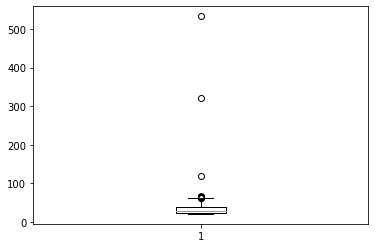

count    358.000000
mean      35.159218
std       32.747653
min       21.000000
25%       24.000000
50%       29.000000
75%       39.000000
max      533.000000
Name: 나이, dtype: float64

In [45]:
plt.boxplot(df_drop_allrow['나이'])
plt.show()

df_drop_allrow['나이'].describe() 

#### - 나이가 100세 초과인 행만 조회

In [142]:
df_drop_allrow[df_drop_allrow['나이'] > 100]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


#### - 나이가 10세 이하인 행만 조회

In [143]:
df_drop_allrow[df_drop_allrow['나이'] <= 10]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이


#### - 나이가 10세 이하, 100세 초과인 행만 조회

In [144]:
df_drop_allrow[(df_drop_allrow['나이'] > 100) | (df_drop_allrow['나이'] <= 10)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


### 2.4 Q1, Q3, IQR를 이용한 이상치 조회

#### - Q1, Q3 값 확인하기

In [61]:
q1 ,q3 = np.percentile(df_drop_allrow['나이'], [25, 75])

print(q1)
print(q3)

24.0
39.0


#### - IQR 값 확인하기

In [145]:
iqr = q3 - q1

In [146]:
iqr

15.0

#### - 최대값, 최소값 알아내기

In [147]:
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(upper_bound)
print(lower_bound)

61.5
1.5


#### - 이상치 조회하기

In [149]:
df_drop_allrow[(df_drop_allrow["나이"] > upper_bound)| (df_drop_allrow["나이"] < lower_bound)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


#### - 함수로 정리

In [150]:
def age_cleansing():
    q1 ,q3 = np.percentile(df_drop_allrow['나이'], [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    return df_drop_allrow[(df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound)]

In [151]:
age_cleansing()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [152]:
def outliers_iqr4(dframe, data) :
    q1, q3 = np.percentile(data, [25, 75])
    print(q1)
    print(q3)
    
    iqr = q3 - q1
    print(iqr)
    
    upper_bound = q3 + (iqr * 1.5)
    print(upper_bound)
    
    lower_bound = q1 - (iqr * 1.5)
    print(lower_bound)
    
    df_temp = dframe[(data > upper_bound) | 
                    (data < lower_bound)]
    
    print(len(df_temp))
    print(df_temp)

#### - 최대값과 최소값을 이용하여 이상치 조회하기

In [156]:
df_drop_allrow[(df_drop_allrow["나이"] > 61.5) | (df_drop_allrow["나이"] < 1.5)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [155]:
print((df_drop_allrow["나이"] > 61.5) | (df_drop_allrow["나이"] < 1.5))

0      False
1      False
2       True
3      False
4      False
       ...  
353    False
354    False
355    False
356    False
357    False
Name: 나이, Length: 358, dtype: bool


### 2.5 np.where 을 이용한 행 번호 조회

#### - 이상치 데이터들의 행 번호 조회

In [160]:
np.where((df_drop_allrow["나이"] > 61.5) | (df_drop_allrow["나이"] < 1.5))

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [161]:
def get_outliers_data(data) :
    q1, q3 = np.percentile(data, [25, 75])
    print(q1)
    print(q3)
    
    iqr = q3 - q1
    print(iqr)
    
    upper_bound = q3 + (iqr * 1.5)
    print(upper_bound)
    
    lower_bound = q1 - (iqr * 1.5)
    print(lower_bound)
    
#     df_temp = dframe[(data > upper_bound) | 
#                     (data < lower_bound)]
    
#     print(len(df_temp))
#     print(df_temp)
    
    return np.where((data > 61.5) | (data < 1.5))

In [162]:
get_outliers_data(df_drop_allrow['나이'])

24.0
39.0
15.0
61.5
1.5


(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

#### - 전체 데이터 프레임에서 행 번호로 이상치 데이터 조회

In [164]:
df_drop_allrow.loc[get_outliers_data(df_drop_allrow['나이'])]

24.0
39.0
15.0
61.5
1.5


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [165]:
age_outlier_index = get_outliers_data(df_drop_allrow['나이'])

24.0
39.0
15.0
61.5
1.5


In [166]:
age_outlier_index

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [115]:
df_drop_allrow.loc[age_outlier_index]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


### 2.6 인덱스 확인

In [167]:
age_outlier_index.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [168]:
df_drop_allrow.index

RangeIndex(start=0, stop=358, step=1)

### 2.7 이상치 제거하기

#### - 이상치 인덱스가 아닌 정상 인덱스만 추출

In [125]:
age_non_outlier_index = list()

for idx in df_drop_allrow.index :
    if idx not in age_outlier_index[0] :
        age_non_outlier_index.append(idx)
        
        
print(len(age_non_outlier_index))
age_non_outlier_index

348


[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 1

#### - 전체 데이터 프레임에서 정상 데이터만 조회

In [171]:
df_new = df_drop_allrow.loc[age_non_outlier_index]

In [172]:
df_new

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
5,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65


In [138]:
df_new = df_new.reset_index(drop = True)

In [139]:
df_new

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
3,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
4,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
354,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
355,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
356,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65


In [140]:
df_new.head(20)

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
3,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
4,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
5,SPB-20220,2019-11-11 8:35,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-11 8:42,3,중랑센터,2.0,6.0,1160.0,53
6,SPB-20102,2019-11-11 9:45,646,장한평역 1번출구 (국민은행앞),8.0,2019-11-11 10:17,3,중랑센터,7.0,30.0,1060.0,54
7,SPB-10000,2019-11-12 8:35,646,장한평역 1번출구 (국민은행앞),8.0,2019-11-12 8:44,3,중랑센터,2.0,8.0,1300.0,30
8,SPB-21851,2019-11-14 9:33,646,장한평역 1번출구 (국민은행앞),10.0,2019-11-14 10:02,3,중랑센터,2.0,28.0,1220.0,51
9,SPB-13973,2019-11-15 8:42,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-15 8:50,3,중랑센터,2.0,6.0,1370.0,32
